# Veri Madenciliğine Giriş Projesi
Egemen Kılıç-170201084

## Diyabet Hastalığının Tahmini Uygulaması
Halk arasında genel olarak  şeker hastalığı olarak tabir edilen Diabetes Mellitus, genel olarak kanda glukoz (şeker) seviyesinin normalin üzerine çıkması, buna bağlı olarak normalde şeker içermemesi gereken idrarda şekere rastlanmasıdır. Farklı türevleri bulunan diyabet hastalığı, ülkemizde ve dünyada en sık rastlanan hastalıklar arasında yer alır. Uluslararası Diyabet Federasyonu'nun sağlamış olduğu istatistiki verilere göre her 11 yetişkinden biri diyabet hastalığına sahip olmakla birlikte her 6 saniyede 1 birey diyabet kaynaklı sorunlar nedeniyle hayatını kaybetmektedir.

Bu çalışmada bir veri seti üzerinden Veri madenciliği algoritmalarını kullanarak diyabet hastalığı tahmini yapamaya çalışıyoruz.

Veri Seti:https://www.kaggle.com/uciml/pima-indians-diabetes-database



In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
diabetes=pd.read_csv('diabetes.csv')

## Kullanılacak Veri Setinin Tanıtımı

In [142]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Kullanacağımız veri setinde toplamda 8 girdi değeri 1 tane de çıktı değeri bulunmaktadır.Çıktı değerlerinde 1 hastalığın olduğunu 0 ise hatalığın olmadığı anlamına gelmektedir.

Pregnancies=Hamilelik sayısı

Glucose=Glikoz değeri

BloodPressure=Kan basıncı

SkinThickness=Cilt kalınlığı

Insulin=İnsülin değeri

BMI=Vücut Kitle Endeksi

DiabetesPedigreeFunction=Diyabet Soy Ağacı Fonksiyonu

Age=Yaş

Outcome=Çıktı

In [143]:
print("Diyabet Veri Setinin Boyutu: {}".format(diabetes.shape))

Diyabet Veri Setinin Boyutu: (768, 9)


In [144]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [145]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


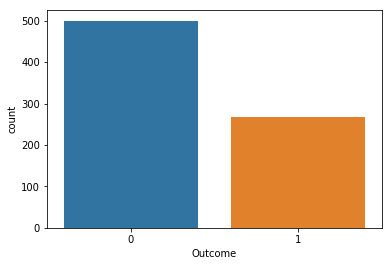

In [146]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

## Veri Ön-İşleme
Veri ön işleme; veri madenciliği modelleri kurulmadan önce veri seti üzerinde yapılan bir takım düzeltme, eksik veriyi tamamlama, tekrarlanan verileri kaldırma, dönüştürme, bütünleştirme, temizleme, normalleştirme, boyut indirgeme vb. işlemlerdir.

In [147]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [148]:
diabetes.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [149]:
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [150]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [151]:
diabetes['Glucose'].fillna(diabetes['Glucose'].mean(), inplace = True)
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(), inplace = True)
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(), inplace = True)
diabetes['Insulin'].fillna(diabetes['Insulin'].median(), inplace = True)
diabetes['BMI'].fillna(diabetes['BMI'].median(), inplace = True)

In [152]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Verilerin içerisinde bulunan eksik verileri o sütunun ortalaması ile doldurduk.

In [153]:
dups=diabetes.duplicated()
print("Tekrar eden satır sayısı:%d" % dups.sum())

Tekrar eden satır sayısı:0


Veri setimizde tekrar eden satırlar bulunmamaktadır.Eğer tekrar eden satırlar olsaydı bu satırların silinmesi gerekirdi.Tekrar eden satırlar silinmezse modellerin doğruluk değerleri olduklarından daha yüksek görünebilir ve bu durum ileride sorunlara yol açabilir.

### Korelasyon Analizi
Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatiksel bir yöntemdir

In [154]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


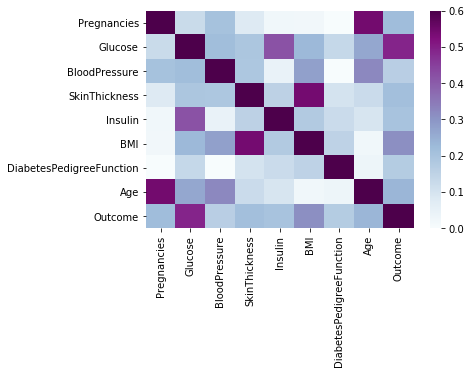

In [155]:
sns.heatmap(diabetes.corr(),vmin=0, vmax=0.6,cmap="BuPu")

In [156]:
diabetes.corr().nlargest(5,'Outcome').index

Index(['Outcome', 'Glucose', 'BMI', 'Age', 'Pregnancies'], dtype='object')

In [157]:
X=diabetes[['Glucose', 'BMI', 'Age', 'Pregnancies']]
y=diabetes.iloc[:,8]

### Veri Setini Eğitim Seti ve Test Seti Şeklinde Ayrımak
Kullanmış olduğumuz veri setini eğitim verisi ve test verisi şeklinde ayırmamız gerekir.

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=66)
#X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'],test_size=0.3, random_state=66)

## Karmaşıklık Matrisi (Confusion Matrix) 

Çıktının iki veya daha fazla olduğu yerlerde makine öğrenmesi sınıflandırması problemleri performansını ölçmek için vardır . Tahmin edilen ve gerçek değerlerle 4 farklı kombinasyonlu bir tablodur .

True Positive (Doğru Pozitif ) :
Yorum : Olumlu tahmin ettiniz ve bu doğru .


Kişinin diyabet hastası olduğunu tahmin ettiniz ve kişi diyabet hastası.


True Negative (Doğru Negatif ):
Yorum : Olumsuz tahmin ettiniz ve bu doğru.


Kişinin diyabet hastası olmadığını tahmin ettiniz ve kişi diyabet hastası değil.


False Positive (Yanlış Olumlu) :
Yorum : Olumlu tahmin ettiniz ve bu yanlış.


Kişinin diyabet hastası olduğunu tahmin ettiniz ama kişi diyabet hastası değil.


False Negative ( Yanlış Olumsuz ) :
Yorum : Olumsuz tahmin ettiniz ve bu yanlış.


Kişinin diyabet hastası olmadığını tahmin ettiniz ama kişi diyabet hastası.

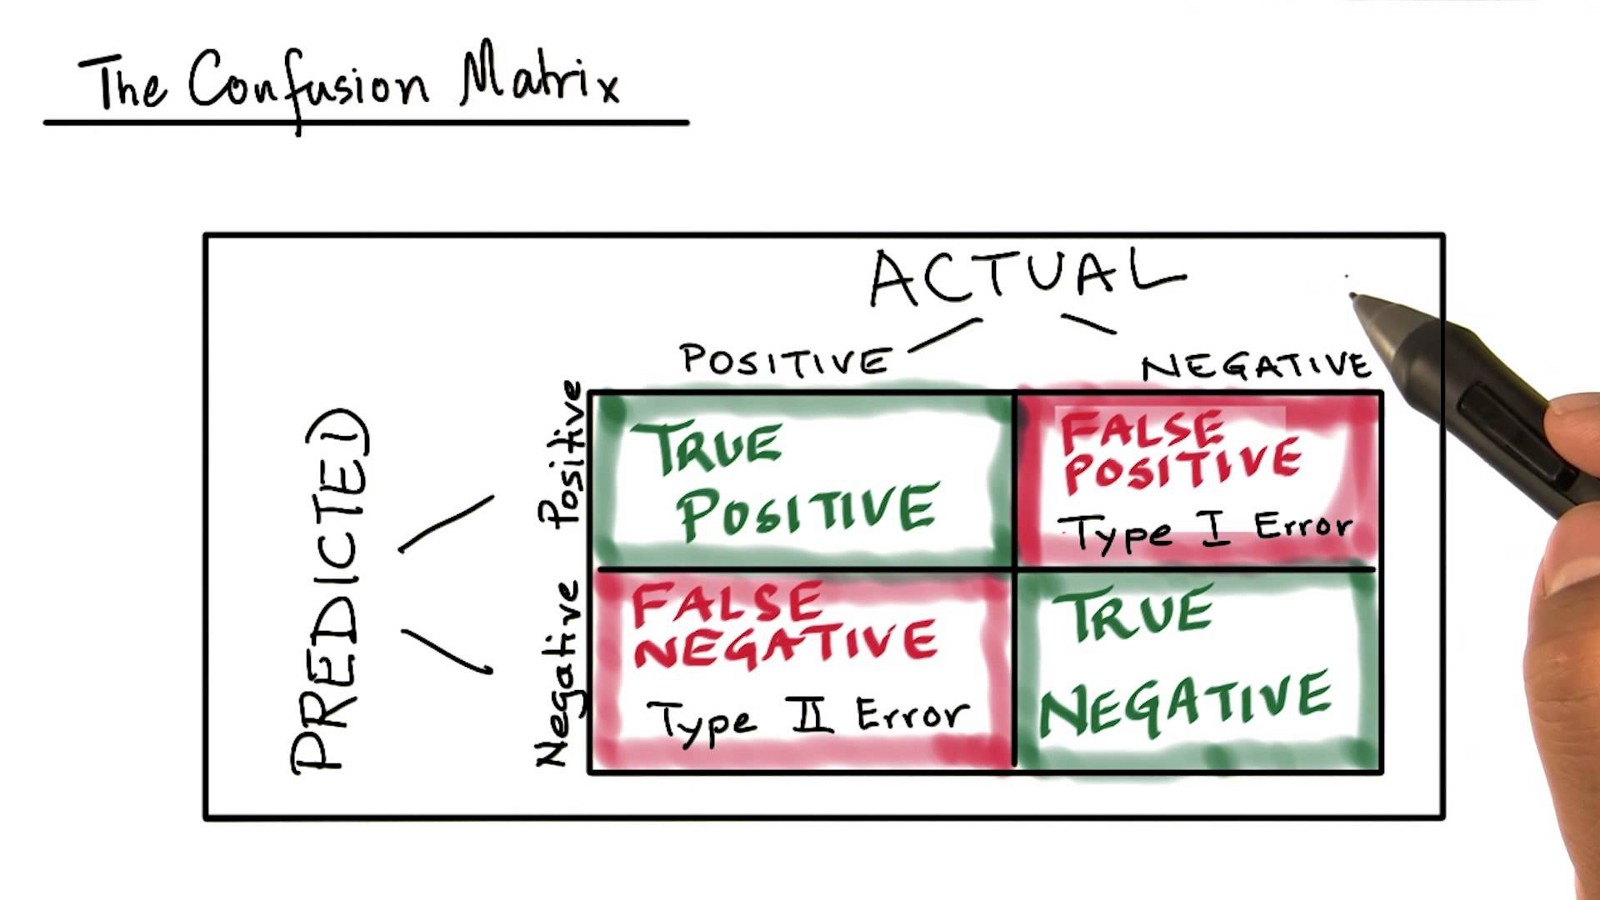

### Recall
Bahsettiğim durumda true positive’ler hasta olarak tahmin edilen ve gerçekten hasta olan insanlar, false negative’ler hasta olmadığı tahmin edilen ama hasta olan insanlar. Recall’a bakma sebebimiz tamamiyle paydadaki false negative’ler, yani hasta olmadığı tahmin edilen ve hasta olan insanlar. Doktorsanız hasta olan birine hasta değil demenin maliyeti ağır olduğu için recall false negative’in gözardı edilemez olduğu durumlarda önemli bir metrik.


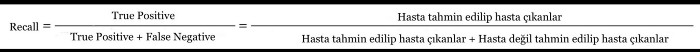

### Precision
Precision hasta tahmin ettiklerimizin kaçının gerçekten hasta olduğu ile ilgilenir, paydada bütün bir pozitif satırını alma sebebimiz de bu. Bu noktada false negative’lerimiz çok fazla olacaktır.
Precision’la recall ters orantılıdır ve ikisinin arasında bir denge tutturmak gerekir. (precision recall trade-off)

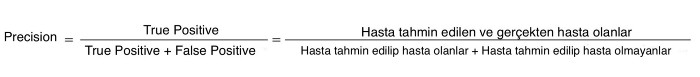

### F1-Score
F1-Score precision ve recall’un harmonik ortalaması.

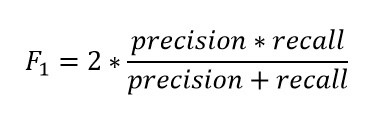

## Makineyi Algoritmalar Yardımı ile Eğitmek
Kullanılacak Algoritmalar

1-Lojistik Regresyon

2-Destek Vektör Makineleri

3-Karar Ağacı

4-Rastgele Orman

### Lojistik Regresyon(Logistic Regression)
Lojistik regresyon, ikili sonuç veren binary değişkenlerin modellenmesinde kullanılmaktadır. İkili durum söz konusu olan modellerde sonuç genellikle 0 veya 1 olarak tanımlanmaktadır.Kullandığımız veri seti için 0 diyabet hastası olmayanları verirken 1 ise diyabet hastalarını vermektedir.

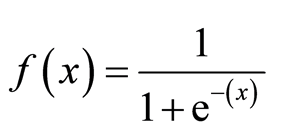

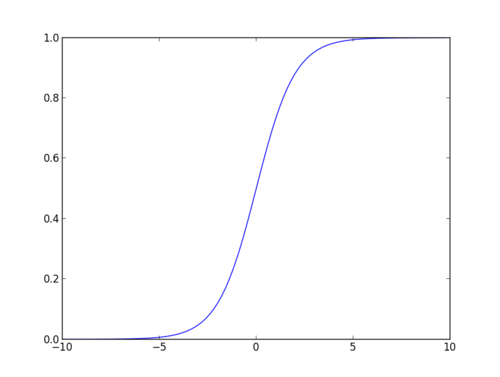

Lojistik fonksiyon olarak da adlandırılan sigmoid fonksiyonu, herhangi bir gerçek değerli sayıyı alıp 0 ile 1 arasındaki bir değere eşleyebilen 'S' şeklinde bir eğri verir. Eğri pozitif sonsuza giderse, tahmin edilen y 1 olur ve eğer eğri negatif sonsuzluğa giderse, tahmin edilen y 0 olur. Sigmoid fonksiyonunun çıktısı 0,5'ten fazlaysa, sonucu 1 veya EVET olarak sınıflandırabiliriz ve 0,5'ten küçükse,sonucu 0 veya HAYIR olarak sınıflandırabiliriz.Örneğin: Çıktı 0,75 ise, olasılık açısından şöyle diyebiliriz: Hastanın kanser olma ihtimali yüzde 75 tir.

In [159]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',random_state=66,C=1).fit(X_train, y_train)
print("Eğitim seti doğruluğu: {:.5f}".format(logreg.score(X_train, y_train)))
print("Test seti doğruluğu  : {:.5f}".format(logreg.score(X_test, y_test)))

Eğitim seti doğruluğu: 0.76350
Test seti doğruluğu  : 0.77922


In [160]:
y_pred_logistic=logreg.predict(X_test)

In [161]:
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score,recall_score,precision_score,f1_score

In [162]:
confusion_matrix(y_pred=y_pred_logistic,y_true=y_test)

array([[141,  19],
       [ 32,  39]], dtype=int64)

In [163]:
print("Modelin Doğruluğu  : {:.5f}".format(accuracy_score(y_pred=y_pred_logistic,y_true=y_test)))
print("Recall Skor        : {:.5f}".format(recall_score(y_pred=y_pred_logistic,y_true=y_test)))
print("Precision Skor     : {:.5f}".format(precision_score(y_pred=y_pred_logistic,y_true=y_test)))
print("F1 Skor            : {:.5f}".format(f1_score(y_pred=y_pred_logistic,y_true=y_test)))

Modelin Doğruluğu  : 0.77922
Recall Skor        : 0.54930
Precision Skor     : 0.67241
F1 Skor            : 0.60465


### Destek Vektör Makineleri(Support Vector Machine)
Destek Vektör Makineleri, temel olarak iki sınıfa ait verileri birbirinden en uygun şekilde ayırmak için kullanılır. Bunun için karar sınırları yada diğer bir ifadeyle hiper düzlemler belirlenir.

SVM, farklı sınıfları ayırmak için çok boyutlu uzayda bir hiper düzlem oluşturur. SVM, bir hatayı en aza indirmek için kullanılan yinelemeli bir şekilde optimum hiper düzlem oluşturur. SVM'nin temel fikri, veri kümesini sınıflara en iyi şekilde bölen bir maksimum marjinal hiper düzlem (MMH) bulmaktır.

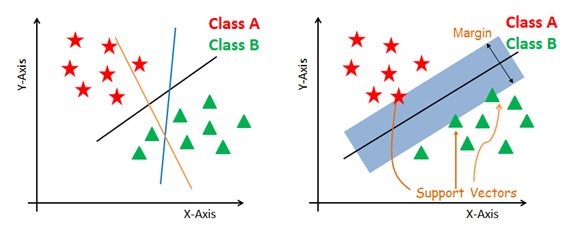

In [164]:
from sklearn.svm import SVC
svc = SVC(gamma='scale',random_state=66)
svc.fit(X_train, y_train)
print("Eğitim seti doğruluğu: {:.5f}".format(svc.score(X_train, y_train)))
print("Test seti doğruluğu  : {:.5f}".format(svc.score(X_test, y_test)))

Eğitim seti doğruluğu: 0.75978
Test seti doğruluğu  : 0.77489


In [165]:
y_pred_svm=svc.predict(X_test)

In [166]:
confusion_matrix(y_pred=y_pred_svm,y_true=y_test)

array([[145,  15],
       [ 37,  34]], dtype=int64)

In [167]:
print("Modelin Doğruluğu  : {:.5f}".format(accuracy_score(y_pred=y_pred_svm,y_true=y_test)))
print("Recall Skor        : {:.5f}".format(recall_score(y_pred=y_pred_svm,y_true=y_test)))
print("Precision Skor     : {:.5f}".format(precision_score(y_pred=y_pred_svm,y_true=y_test)))
print("F1 Skor            : {:.5f}".format(f1_score(y_pred=y_pred_svm,y_true=y_test)))

Modelin Doğruluğu  : 0.77489
Recall Skor        : 0.47887
Precision Skor     : 0.69388
F1 Skor            : 0.56667


### Karar Ağacı Algoritması(Decision Tree )

Karar ağaçları – sınıflama, özellik ve hedefe göre karar düğümleri (decision nodes) ve yaprak düğümlerinden (leaf nodes) oluşan ağaç yapısı formunda bir model oluşturan bir sınıflandırma yöntemidir. Karar ağacı algoritması, veri setini küçük ve hatta daha küçük parçalara bölerek geliştirilir. Bir karar düğümü bir veya birden fazla dallanma içerebilir. İlk düğüme kök düğüm (root node) denir. Bir karar ağacı hem kategorik hem de sayısal verilerden oluşabilir.


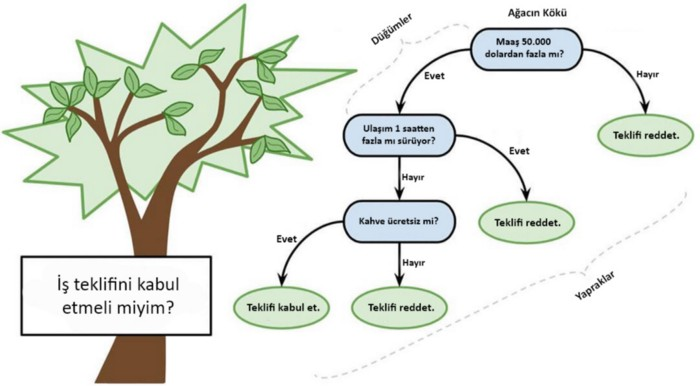

In [168]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=66)
tree.fit(X_train, y_train)
print("Eğitim seti doğruluğu: {:.5f}".format(tree.score(X_train, y_train)))
print("Test seti doğruluğu  : {:.5f}".format(tree.score(X_test, y_test)))

Eğitim seti doğruluğu: 0.80261
Test seti doğruluğu  : 0.71861


In [169]:
y_pred_tree=tree.predict(X_test)

In [170]:
confusion_matrix(y_pred=y_pred_tree,y_true=y_test)

array([[131,  29],
       [ 36,  35]], dtype=int64)

In [171]:
print("Modelin Doğruluğu  : {:.5f}".format(accuracy_score(y_pred=y_pred_tree,y_true=y_test)))
print("Recall Skor        : {:.5f}".format(recall_score(y_pred=y_pred_tree,y_true=y_test)))
print("Precision Skor     : {:.5f}".format(precision_score(y_pred=y_pred_tree,y_true=y_test)))
print("F1 Skor            : {:.5f}".format(f1_score(y_pred=y_pred_tree,y_true=y_test)))

Modelin Doğruluğu  : 0.71861
Recall Skor        : 0.49296
Precision Skor     : 0.54688
F1 Skor            : 0.51852


### Rastgele Orman Algoritması(Random Forest)

Rastgele ormanlar, denetimli bir öğrenme algoritmasıdır. Hem sınıflandırma hem de regresyon için kullanılabilir. Aynı zamanda en esnek ve kullanımı kolay algoritmadır.

Dört adımda çalışır:

Belirli bir veri kümesinden rastgele örnekler seçilir.

Her örnek için bir karar ağacı oluşturulur ve her karar ağacından bir tahmin sonucu alınır.

Tahmin edilen her sonuç için bir oylama yapılır.

Nihai tahmin olarak en çok oyu alan tahmin sonucunu seçilir.

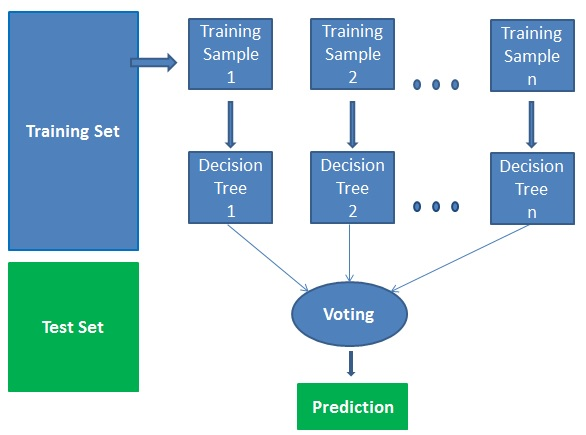

In [172]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Eğitim seti doğruluğu: {:.5f}".format(rf.score(X_train, y_train)))
print("Test seti doğruluğu  : {:.5f}".format(rf.score(X_test, y_test)))

Eğitim seti doğruluğu: 0.79888
Test seti doğruluğu  : 0.74026


In [173]:
y_pred_rf=rf.predict(X_test)

In [174]:
confusion_matrix(y_pred=y_pred_rf,y_true=y_test)

array([[135,  25],
       [ 35,  36]], dtype=int64)

In [175]:
print("Modelin Doğruluğu  : {:.5f}".format(accuracy_score(y_pred=y_pred_rf,y_true=y_test)))
print("Recall Skor        : {:.5f}".format(recall_score(y_pred=y_pred_rf,y_true=y_test)))
print("Precision Skor     : {:.5f}".format(precision_score(y_pred=y_pred_rf,y_true=y_test)))
print("F1 Skor            : {:.5f}".format(f1_score(y_pred=y_pred_rf,y_true=y_test)))

Modelin Doğruluğu  : 0.74026
Recall Skor        : 0.50704
Precision Skor     : 0.59016
F1 Skor            : 0.54545


## Performans Karşılaştırması
ROC bize modelin true positive rate’iyle false positive rate’i cinsinden ne kadar iyi ayrım yapabildiğini açıklar.

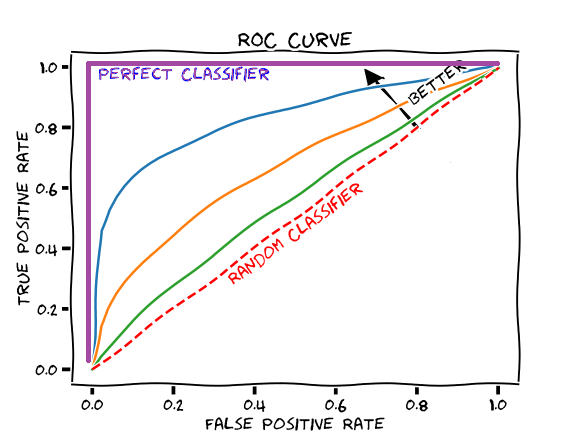

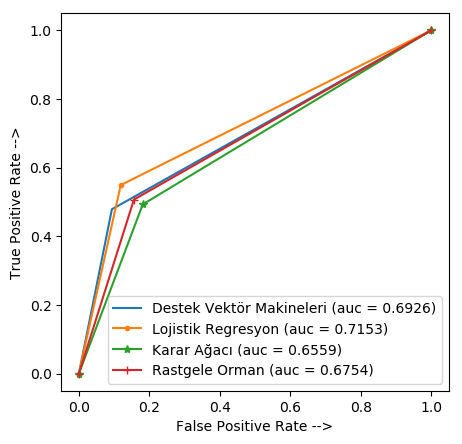

In [177]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

tree_fpr, tree_tpr, threshold = roc_curve(y_test, y_pred_tree)
auc_tree = auc(tree_fpr, tree_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='Destek Vektör Makineleri (auc = %0.4f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Lojistik Regresyon (auc = %0.4f)' % auc_logistic)
plt.plot(tree_fpr, tree_tpr, marker='*', label='Karar Ağacı (auc = %0.4f)' % auc_tree)
plt.plot(rf_fpr, rf_tpr, marker='+', label='Rastgele Orman (auc = %0.4f)' % auc_rf)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## Sonuç
Yaptığımız eğitimlerin sonucunda en başarılı sonucu veren algoritma Lojistik Regresyon algoritması oluyor.

170201084 Egemen KILIÇ